A thermoelectric cell has a figure of merit $Z$ and an internal resistance of $R$. The average Seebeck coefficient is $\alpha$. Heat flow meters are used to measure the flow of heat, $P_\text{H}$, from the hot source to the cell and the flow, $P_\text{C}$, from the cell to the cold sink. There is no other heat exchange between the cell and environment. The source is at $T_H$ and the sink at $T_C$.

1) With no electric current flowing in the cell, what is the value of $P_H$ and $P_C$? 

2) A current, $I$, is now made to circulate. This modifies $P_H$. What currents cause $P_H$ to go to zero? 

3) Over what range of currents does the cell act as a power generator? 

In [1]:
Z_perK = 0.002
R_Ohm = 100e-6
alpha_VperK = 200e-6
TH_K = 600
TC_K = 300

# round(random.uniform(500, 5000),-1)

In [2]:
# figure of merit for a thermocouple:
# Z = alpha^2 / (Lambda * R)

Lambda_WperK = Z_perK*R_Ohm/(alpha_VperK**2); print(Lambda_WperK)

5.0


In [3]:
# no current case
PH_W = Lambda_WperK*(TH_K - TC_K); print(PH_W)

1500.0


In [4]:
PC_W = PH_W # steady state, first law energy balance, no work transfer out.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, '$P_H$ [W/m2]')

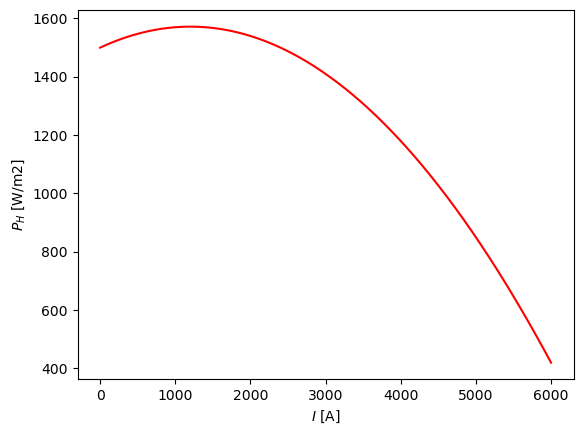

In [6]:
I_A_ = np.linspace(0.001, 6000, 10000)

# PH_ = [Lambda_WperK*(TH_K - TC_K) + piH*I - (1/2)*R_Ohm*(I**2) for I in I_A_]

piH = alpha_VperK*TH_K

PH_ = Lambda_WperK*(TH_K - TC_K) + piH*I_A_ - (1/2)*R_Ohm*(I_A_**2)
RL_Ohm_ = -R_Ohm + alpha_VperK*(TH_K - TC_K)/I_A_
PL_ = ((alpha_VperK**2)*((TH_K - TC_K)**2)/((R_Ohm + RL_Ohm_)**2))*RL_Ohm_

plt.plot(I_A_, PH_, 'r-')

plt.xlabel('$I$ [A]')
plt.ylabel('$P_H$ [W/m2]')

# plt.savefig('thermionic-eta-phiE-diagram.png')

Text(0, 0.5, '$P_L$ [W/m2]')

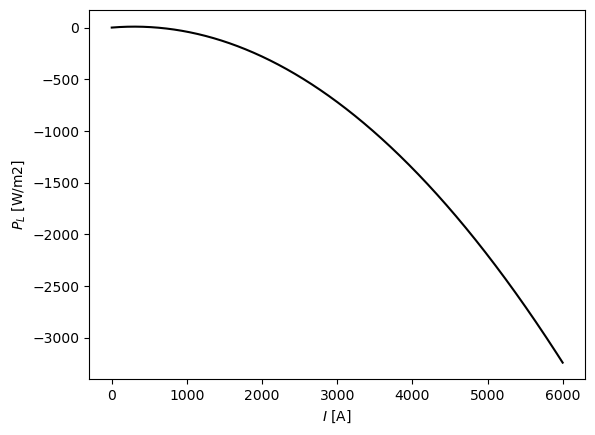

In [7]:
plt.plot(I_A_, PL_, 'k-')

plt.xlabel('$I$ [A]')
plt.ylabel('$P_L$ [W/m2]')

In [8]:
import numpy as np

def equation(x):
    return Lambda_WperK*(TH_K - TC_K) + piH*x - (1/2)*R_Ohm*(x**2)

def derivative(x):
    return piH - R_Ohm*x

def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for _ in range(max_iter):
        f_val = f(x)
        df_val = df(x)
        if abs(f_val) < tol:
            return x
        if df_val == 0:
            raise ValueError("Derivative is zero. No solution found.")
        x -= f_val / df_val
    raise ValueError("Maximum iterations exceeded. No solution found.")

# Example initial guess
x0 = 10000.0  

# Solve for x
x_solution = newton_raphson(equation, derivative, x0)
print(f"Solution for x: {x_solution:.6f}")


Solution for x: 6807.138308


In [9]:
ans = x_solution
PH_zero = Lambda_WperK*(TH_K - TC_K) + piH*ans - (1/2)*R_Ohm*(ans**2); print(PH_zero)

-2.1288769858074374e-07
